In [12]:
import sys
import pandas
import matplotlib
import seaborn
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split


In [13]:
#Load the data
games=pandas.read_csv('games.csv')

In [14]:
#Print the names of the columns of the games
print(games.columns)
print(games.shape)

Index(['id', 'type', 'name', 'yearpublished', 'minplayers', 'maxplayers',
       'playingtime', 'minplaytime', 'maxplaytime', 'minage', 'users_rated',
       'average_rating', 'bayes_average_rating', 'total_owners',
       'total_traders', 'total_wanters', 'total_wishers', 'total_comments',
       'total_weights', 'average_weight'],
      dtype='object')
(81312, 20)


(array([24380.,   606.,  1325.,  3303.,  6687., 12277., 15849., 11737.,
         3860.,  1288.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <a list of 10 Patch objects>)

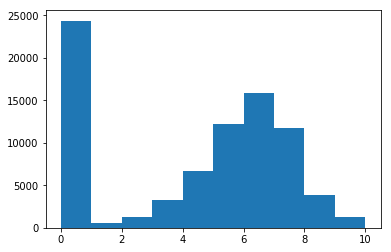

In [15]:
#Make a histogram of all ratings in the average rating column
plt.hist(games["average_rating"])
#plt.show()

In [19]:
#Print the first row of all the games with zero scores
print(games[games["average_rating"]==0].iloc[0])
#Print the first row of games with scores greater than 0
print(games[games["average_rating"]>0].iloc[0])

id                             318
type                     boardgame
name                    Looney Leo
yearpublished                    0
minplayers                       0
maxplayers                       0
playingtime                      0
minplaytime                      0
maxplaytime                      0
minage                           0
users_rated                      0
average_rating                   0
bayes_average_rating             0
total_owners                     0
total_traders                    0
total_wanters                    0
total_wishers                    1
total_comments                   0
total_weights                    0
average_weight                   0
Name: 13048, dtype: object
id                                  12333
type                            boardgame
name                    Twilight Struggle
yearpublished                        2005
minplayers                              2
maxplayers                              2
playingtime          

(array([  602.,  1231.,  2824.,  5206.,  8223., 13593., 13849.,  8470.,
         2224.,   672.]),
 array([ 1. ,  1.9,  2.8,  3.7,  4.6,  5.5,  6.4,  7.3,  8.2,  9.1, 10. ]),
 <a list of 10 Patch objects>)

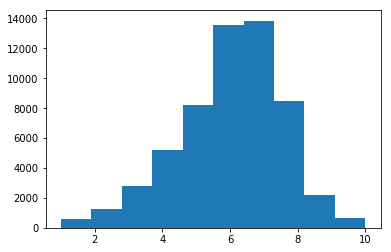

In [25]:
#Remove any row without user reviews
games=games[games["users_rated"]>0]
#Remove any row with missing values
games=games.dropna(axis=0)
#Make a histogram of all average ratings
plt.hist(games["average_rating"])
#plt.show()

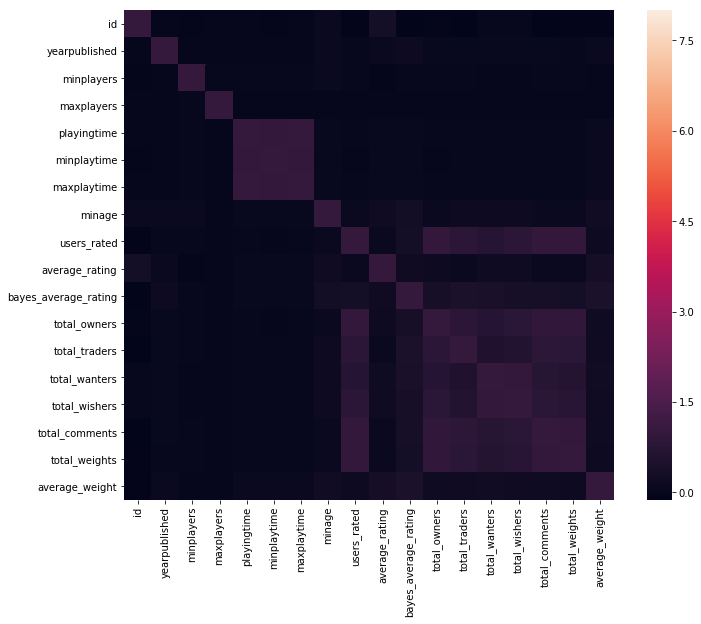

In [48]:
#Correlation matrix
corrmat=games.corr()
fig=plt.figure(figsize=(12,9))
sns.heatmap(corrmat,vmax=8,square=True)
plt.show()

In [30]:
#Get all the columns from the dataframe
columns=games.columns.tolist()

#Filter the columns to remove the data we do not want
columns=[c for c in columns if c not in ["bayes_average_rating","average_rating","type","name","id"]]

#Store the variable we will be predicting on
target="average_rating"

In [33]:
#Generate training and test datasets
from sklearn.model_selection import train_test_split
# Here on the place of model_selection we can also use cross_validation
#Generate training set
train=games.sample(frac=0.8,random_state=1)

#Select anything not in the training set and put it in test
test=games.loc[~games.index.isin(train.index)]

#Print shapes
print(train.shape)
print(test.shape)

(45515, 20)
(11379, 20)


In [35]:
#import Linear regression model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

#initialize the model class
LR=LinearRegression()

#Fit the model the training data
LR.fit(train[columns],train[target])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [37]:
#Generate predictions for the test set
predictions=LR.predict(test[columns])

#Compute error between our test predictions and actual values
mean_squared_error(predictions,test[target])

2.0788190326293257

In [38]:
#Import the random forest Model
from sklearn.ensemble import RandomForestRegressor

#initialize the model
RFR=RandomForestRegressor(n_estimators=100,min_samples_leaf=10,random_state=1)

#Fit the data
RFR.fit(train[columns],train[target])

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=10, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=False, random_state=1, verbose=0, warm_start=False)

In [39]:
#Make predictions
predictions=RFR.predict(test[columns])

#Compute the error between our test predictions and actual values
mean_squared_error(predictions,test[target])

1.4458564605687358

In [40]:
test[columns].iloc[0]

yearpublished      2011.0000
minplayers            2.0000
maxplayers            6.0000
playingtime         200.0000
minplaytime          60.0000
maxplaytime         200.0000
minage               14.0000
users_rated       15709.0000
total_owners      17611.0000
total_traders       273.0000
total_wanters      1108.0000
total_wishers      5581.0000
total_comments     3188.0000
total_weights      1486.0000
average_weight        3.6359
Name: 9, dtype: float64

In [42]:
#Make predictions with both models
rating_LR=LR.predict(test[columns].iloc[0].values.reshape(1,-1))
rating_RFR=RFR.predict(test[columns].iloc[0].values.reshape(1,-1))

#Print out the predictions
print(rating_LR)
print(rating_RFR)

[8.12061283]
[7.91373581]


In [43]:
test[target].iloc[0]

8.07933